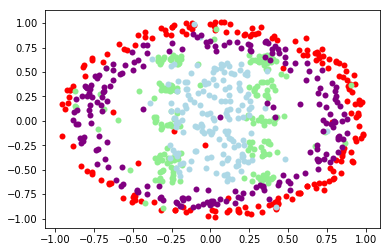

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

file = open('train.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X = np.ndarray((0, 2))
y = np.ndarray((0,))
y = y.astype(int)
y_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
  i += 1
  X = np.vstack((X, np.array(row[0:2])))
  y = np.append(y, y_mapping[row[2]])
X = X.astype(np.float)
y = y.astype(np.float)
file.close()

X_train = X
y_train = y

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Bob', c='red', linewidths=0)
plt.scatter(
    X[y == 1, 0], X[y == 1, 1], label='Kate', c='lightgreen', linewidths=0)
plt.scatter(
    X[y == 2, 0], X[y == 2, 1], label='Mark', c='lightblue', linewidths=0)
plt.scatter(X[y == 3, 0], X[y == 3, 1], label='Sue', c='purple', linewidths=0)
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# pipe1 = SVC, pipe2 = DecisionTree, and pipe3 = KNN
pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', SVC(C=100)]])
pipe2 = Pipeline([['clf', DecisionTreeClassifier(max_depth=3, random_state=0)]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', KNeighborsClassifier(n_neighbors=3)]])

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf_labels = ['SVC', 'DecisionTree', 'KNN']
print('[Individual]')
for pipe, label in zip([pipe1, pipe2, pipe3], clf_labels):
  scores = cross_val_score(
      estimator=pipe, X=X_train, y=y_train, cv=10, scoring='accuracy')
  print('%s: %.3f (+/- %.3f)' % (label, scores.mean(), scores.std()))

[Individual]
SVC: 0.853 (+/- 0.044)
DecisionTree: 0.506 (+/- 0.034)
KNN: 0.838 (+/- 0.043)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

file = open('test.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)

X = np.ndarray((0, 2))
y = np.ndarray((0,))
y = y.astype(int)
y_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}

i = 0
for row in reader:
  i += 1
  X = np.vstack((X, np.array(row[0:2])))
  y = np.append(y, y_mapping[row[2]])
X = X.astype(np.float)
y = y.astype(np.float)
file.close()

X_test = X
y_test = y

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = SVC(C=100)
clf.fit(X_train_std,y_train)
y_predict = clf.predict(X_test_std)

print('Best:')
print('%.3f' % accuracy_score(y_test,y_predict))

Best:
0.816
